## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [3]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

print("Інформація")
print(dataset.describe())

print("\n Розмірність")
print(dataset.shape)

print("\n Типи змінних")
print(dataset.info())

Інформація
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 Розмірність
(891, 12)

 Типи змінних
<class 'pandas.core.frame.DataF

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [2]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

missing = dataset.isnull().sum()

print(missing)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: деяка інформація про пасажирів була втрачена

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



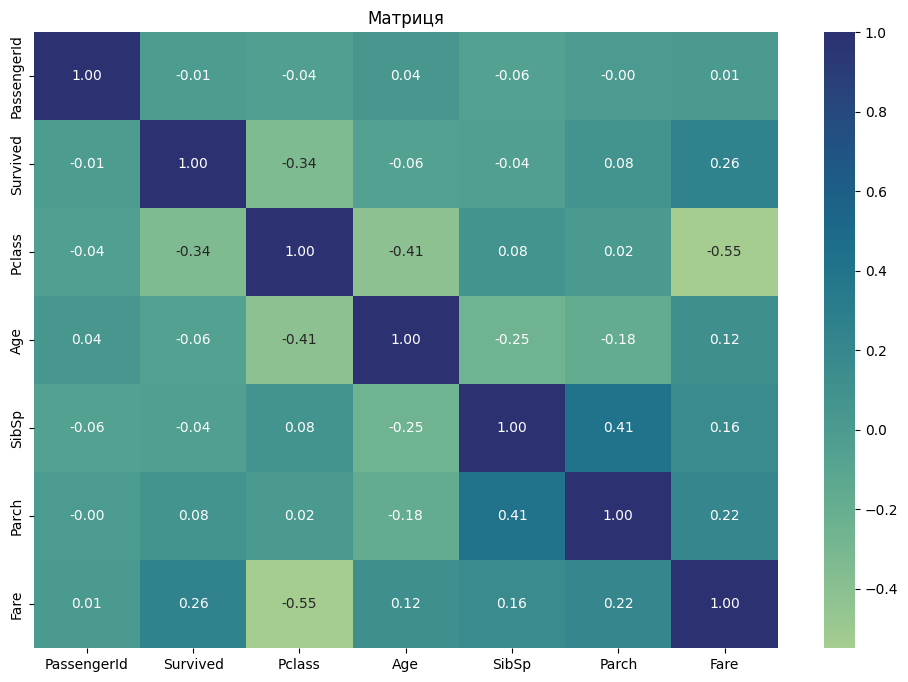

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

nums = dataset.select_dtypes(include=['number'])

matrix = nums.corr(method='pearson')

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(matrix, ax=ax, annot=True, cmap="crest", fmt=".2f")

ax.set_title('Матриця')

plt.show()


Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [10]:
import pandas as pd

def missingFill(df, column, columns):
    df[column] = df.groupby(columns)[column].transform(lambda x: x.fillna(x.median()))
    return df

dataset = pd.read_csv('titanic.csv')

full = missingFill(dataset, 'Age', ['Sex', 'Pclass'])

missing_values_filled = full.isnull().sum()
print(missing_values_filled)


Кількість пропущених значень після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: після заповнення лишилось 0 пропущених значень, це корисно бо дозволяє уникнути втрат даних під час аналізу

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\Igor\AppData\Local\Temp\ipykernel_1252\502432612.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageBinSurvived = dataset.groupby(['Age_bin', 'Survived']).size().unstack()


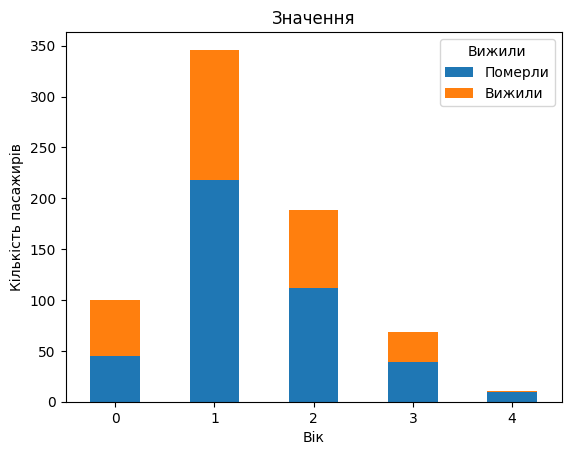

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('titanic.csv')

bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]

dataset['Age_bin'] = pd.cut(dataset['Age'], bins=bins, labels=labels, include_lowest=True)

ageBinSurvived = dataset.groupby(['Age_bin', 'Survived']).size().unstack()
ageBinSurvived.plot(kind='bar', stacked=True)
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.title('Значення')
plt.xticks(rotation=0)
plt.legend(title='Вижили', labels=['Померли', 'Вижили'])
plt.show()


Ваші висновки: так зручно розділяти великі дані для оптимізації аналізу

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Survived           0    1
fare_bin                 
(-0.001, 7.91]   179   44
(7.91, 14.454]   156   68
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129


C:\Users\Igor\AppData\Local\Temp\ipykernel_1252\1535898834.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivedFare = dataset.groupby(['fare_bin', 'Survived']).size().unstack()


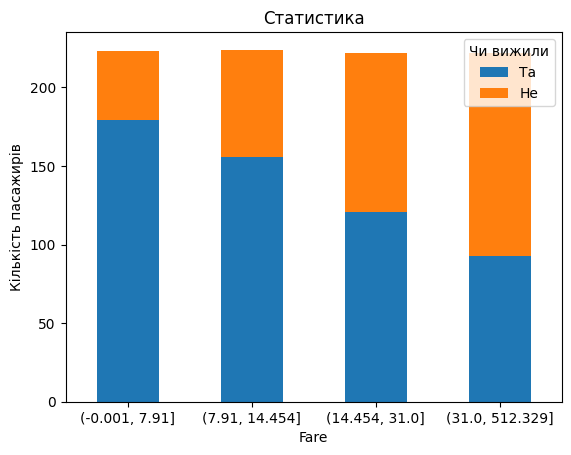

In [21]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

dataset['fare_bin'] = pd.qcut(dataset['Fare'], q=4)

survivedFare = dataset.groupby(['fare_bin', 'Survived']).size().unstack()

print(survivedFare)

survivedFare.plot(kind='bar', stacked=True, title='Статистика')
plt.xlabel('Fare')
plt.ylabel('Кількість пасажирів')
plt.xticks(rotation=0)
plt.legend(title='Чи вижили', labels=['Та', 'Не'])
plt.show()


Ваші висновки: Чим дорожщий квиток тим більше шансів вижити

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [23]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']

dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

family = dataset.groupby('Family_size')['Survived'].mean()
alone = dataset.groupby('Alone')['Survived'].mean()

# Виведення результатів
print("Survival rate by family size:")
print(family)
print("\nSurvival rate if alone or not:")
print(alone)


Survival rate by family size:
Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Survival rate if alone or not:
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Ваші висновки: людям з сімєю більше жансів вижити, це може бути через те що дітей садили разом з батьками

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [24]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

dataset.drop(['Age', 'Cabin'], axis=1, inplace=True)

print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


Ваші висновки: багато пропущених значень

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [26]:
import pandas as pd

# Завантаження даних
dataset = pd.read_csv('titanic.csv')

sex = pd.get_dummies(dataset['Sex'], drop_first=True)
dataset = pd.concat([dataset, sex], axis=1)
dataset.rename(columns={'male': 'Sex_encoded'}, inplace=True)
dataset.drop('Sex', axis=1, inplace=True)

emb = pd.get_dummies(dataset['Embarked'], drop_first=True)
dataset = pd.concat([dataset, emb], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)

dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_encoded = pd.get_dummies(dataset['Title'], drop_first=True)
dataset = pd.concat([dataset, title_encoded], axis=1)
dataset.drop(['Name', 'Title'], axis=1, inplace=True)

print(dataset.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare Cabin  Sex_encoded  ...  Major  Master   Miss   Mlle    Mme     Mr  \
0   7.2500   NaN         True  ...  False   False  False  False  False   True   
1  71.2833   C85        False  ...  False   False  False  False  False  False   
2   7.9250   NaN        False  ...  False   False   True  False  False  False   
3  53.1000  C123        False  ...  False   False  False  False  False  False   
4   8.0500   NaN         True  ...  False   False  False  False  False   True   

     Mrs     Ms    Rev    Sir  
0  False  False  False  False  
1   

<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Igor\AppData\Local\Temp\ipykernel_1252\331348884.py:15: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Ваші висновки: можна змінювати строки в числа, а з числами працювати можна в рази скорше, що оптимізує роботу

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



ValueError: Could not interpret value `Title` for `x`. An entry with this name does not appear in `data`.

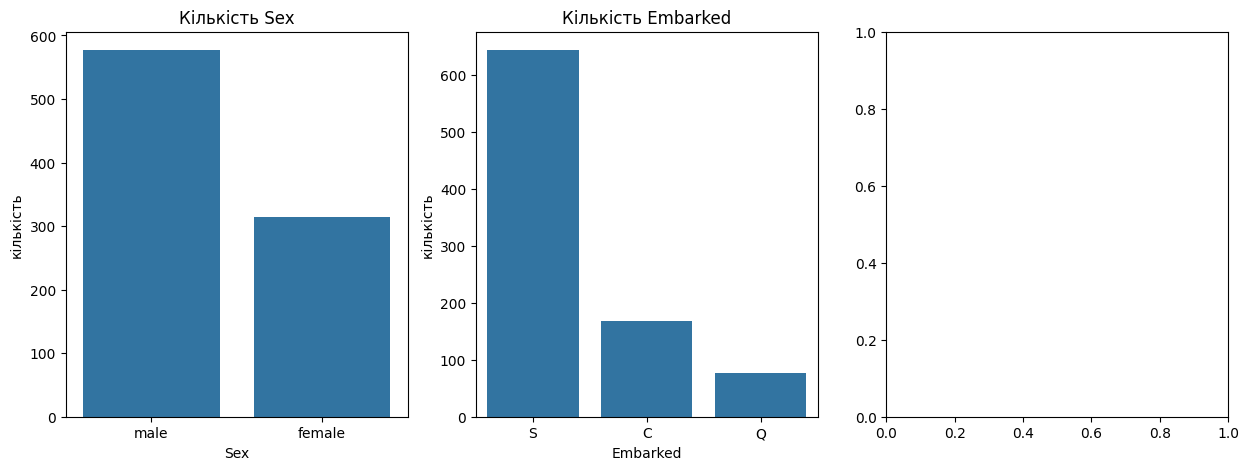

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')

vars = ['Sex', 'Embarked', 'Title']

plt.figure(figsize=(15, 5))
for i, var in enumerate(vars, 1):
    plt.subplot(1, len(vars), i)
    sns.countplot(data=titanic_df, x=var)
    plt.title(f'Кількість {var}')
    plt.xlabel(var)
    plt.ylabel('кількість')

plt.tight_layout()
plt.show()


Ваші висновки: чоловіків тут більше, так як і посад S

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

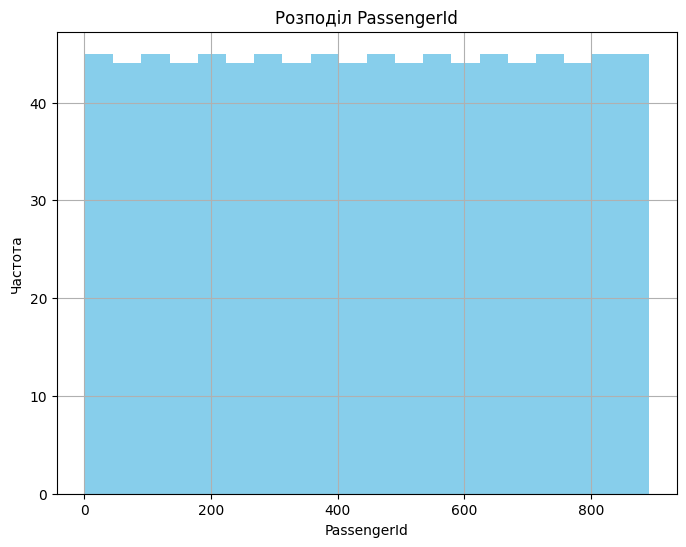

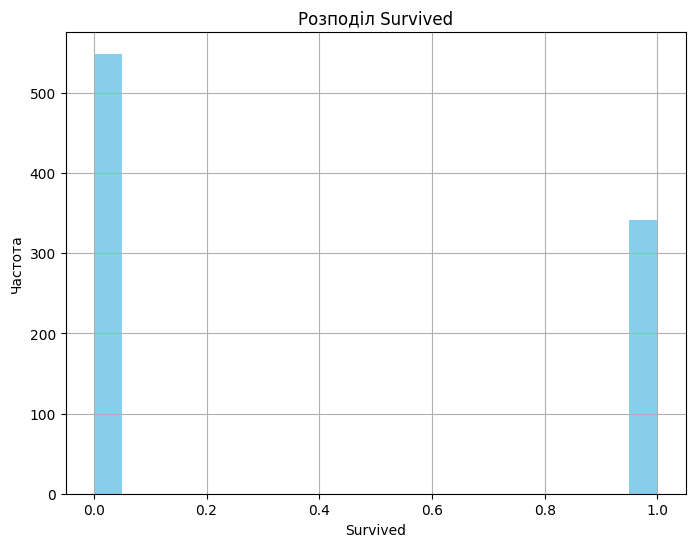

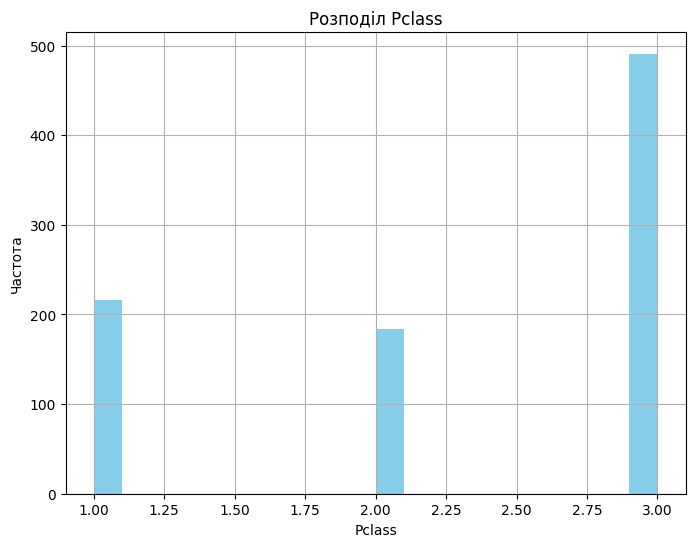

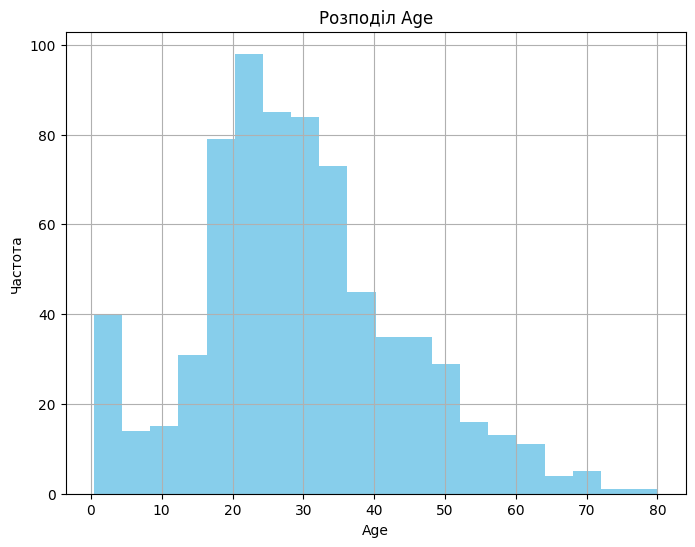

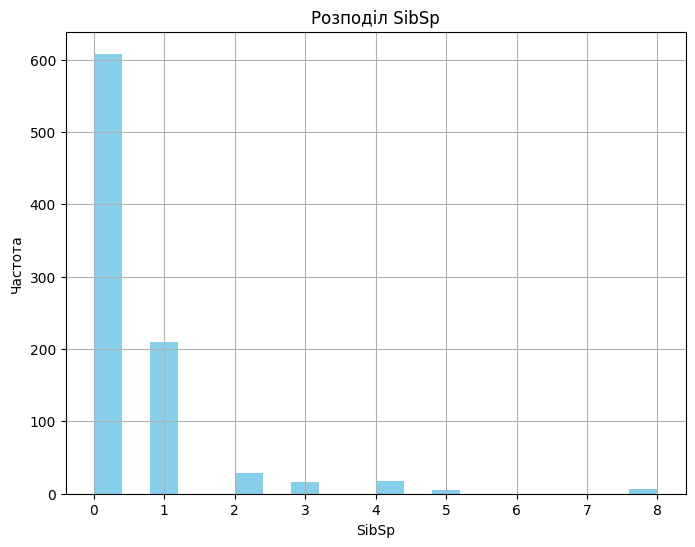

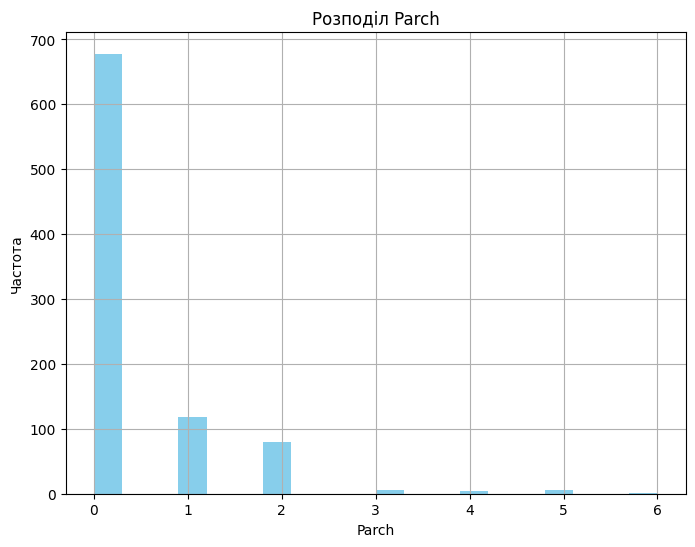

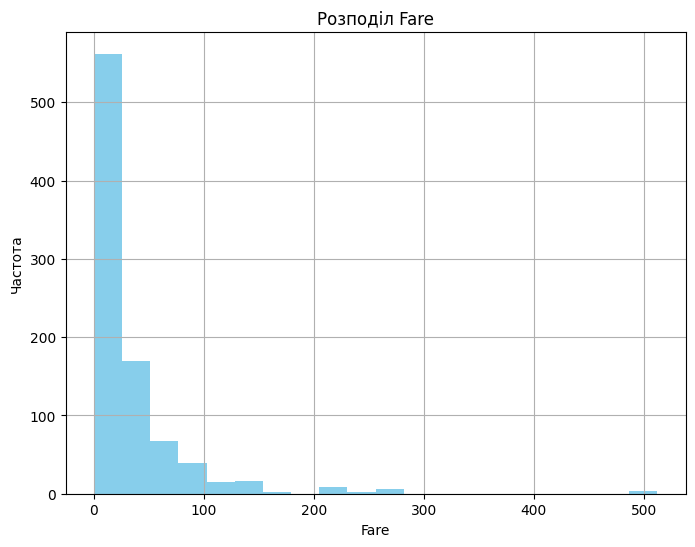

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
dataset = pd.read_csv('titanic.csv')

# Вибір лише числових стовпців
columns = dataset.select_dtypes(include=['int64', 'float64'])

# Побудова гістограм для кожної числової змінної
for column in columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(dataset[column], bins=20, color='skyblue')
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()


Ваші висновки: Людей віком 20 було майже так само, як і 40 літніх. В більшості були брати і сестри, діти і т.д, тобто мали сімї. Більшість брала дешеві квитки

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

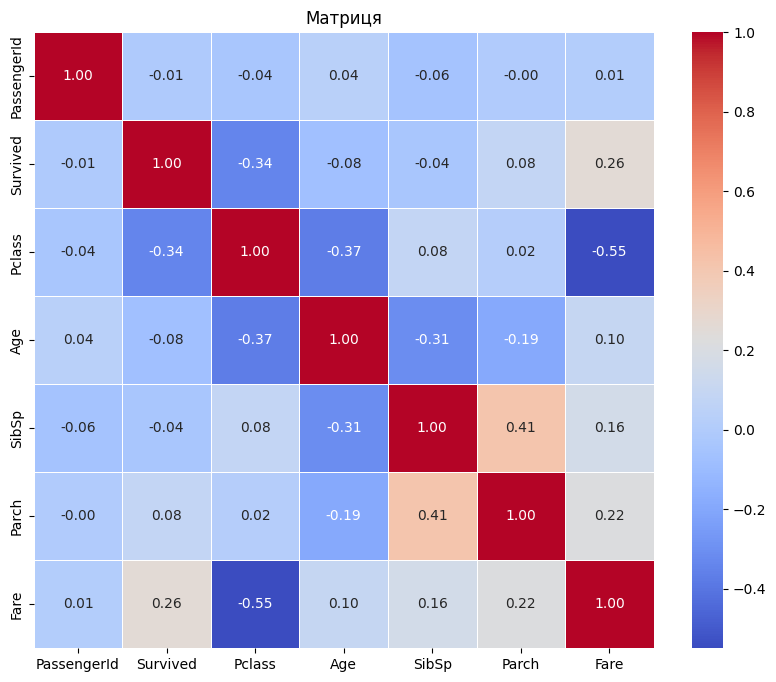

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('titanic.csv')

vars = dataset.select_dtypes(include=['int64', 'float64'])

matrix = vars.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Матриця')
plt.show()


Ваші висновки: є якась червона діагональна лінія, дорівнює одиниці коли по x і по y однаковий стовбчик (наприклад Fare Fare). Більше нічого сказати не можу

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.